In [1]:
import pandas as pd
import os 
import glob
import numpy as np
from IPython.display import display

## Read

In [2]:
datasets = glob.glob(os.path.join("./Dataset", "*.csv"))

dataframes = {}
for file in datasets:
    name = os.path.splitext(os.path.basename(file))[0] 
    dataframes[name] = pd.read_csv(file)

In [3]:
member = dataframes['member_data']
program = dataframes['prodgram_data']
product = dataframes['product_data']
transaction_test = dataframes['test_transaction_data']
transaction_train = dataframes['train_transaction_data']
label = dataframes['train_label_data']

In [15]:
display(member.head(),
        member.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46401 entries, 0 to 46400
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MemberID        46401 non-null  object
 1   JoinDate        46401 non-null  object
 2   DateOfBirth     1477 non-null   object
 3   City            46401 non-null  object
 4   NoOfChild       46401 non-null  int64 
 5   EldestKidDOB    46401 non-null  object
 6   YoungestKidDOB  46401 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.5+ MB


,MemberID,JoinDate,DateOfBirth,City,NoOfChild,EldestKidDOB,YoungestKidDOB
0,3d47296d92956ad3669769c16318a2de,2013-07-17,1983-04-01,KUBU RAYA,3,2011-07-03,2019-03-25
1,94f2dbc9b6ae8689663b168b6bcff3ca,2016-11-25,2016-11-25,MAKASAR,2,2014-09-05,2017-12-26
2,23e22dbecfa0564d43d79bb32694b557,2016-11-30,2017-02-06,BEKASI,1,2015-03-10,2015-03-10
3,eb7cd93fd803f3ec057d0fc144b3ea22,2016-12-01,2016-12-01,SEMARANG,1,2015-11-06,2015-11-06
4,2065ab9406e66082dc01faeceba90d42,2016-12-05,2017-04-28,SEMARANG,3,2013-07-08,2016-03-12


None

null cuma di dateofbirth, parah

In [16]:
display(transaction_train.head(),
        transaction_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130854 entries, 0 to 130853
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TransactionID        130854 non-null  object 
 1   MemberID             130854 non-null  object 
 2   Source               130854 non-null  object 
 3   FK_PRODUCT_ID        130854 non-null  int64  
 4   FK_PROD_GRAM_ID      130854 non-null  int64  
 5   Qty                  130854 non-null  int64  
 6   PricePerUnit         111681 non-null  float64
 7   TransactionDatetime  130854 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 8.0+ MB


,TransactionID,MemberID,Source,FK_PRODUCT_ID,FK_PROD_GRAM_ID,Qty,PricePerUnit,TransactionDatetime
0,ffd6c035bef03a2c386caf2552148fb2402b0b24,7ef72aa51aecb701dc5c4074480fcdf6,ELANG,27,52,1,NaN,2020-07-01 07:41:00 UTC
1,4fadf10aff7e250cc8d63badeaefdf383c0e1c13,577f1b9a093c2cec6398b1118f5d99ab,ALFAMART,22,39,1,290000.0,2020-07-01 07:24:00 UTC
2,7299df1aaf47b52017f58dd8e59df1fe37072670,e2ee74f248a74ed886a22f14348fbafd,EKTONG,22,39,1,263500.0,2020-07-01 09:13:00 UTC
3,22dae0e1e8bb87601eabd712721bd249739bc620,cefa8ef7469a8b4e6df3f745d4905000,CITRA,27,52,3,145000.0,2020-07-01 08:28:00 UTC
4,6a744d5d79e09b0c1646e604db1c4ec65eff73d7,5eecda17ddf06ed9d79f298b13f84785,INDOMARET,27,52,1,165900.0,2020-07-01 07:02:00 UTC


None

null cuma di quantity

In [ ]:
display(product.head(),
        product.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   productID        27 non-null     int64 
 1   ProductName      27 non-null     object
 2   ProductCategory  27 non-null     object
 3   ProductLevel     27 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


,productID,ProductName,ProductCategory,ProductLevel
0,1,A 3,A,Original
1,2,B 4,B,Original
2,3,A G,A,Premium
3,4,B G,B,Premium
4,9,A G FOR HOME KIOS,A,Premium


None

(27, 4)


amann

In [19]:
display(program.head(),
        program.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   prodgramID    27 non-null     int64  
 1   GrammageName  26 non-null     object 
 2   Point         27 non-null     int64  
 3   Price         22 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 992.0+ bytes


,prodgramID,GrammageName,Point,Price
0,1,400 GR,25,102000.0
1,2,400 GR,25,102000.0
2,3,400 GR,50,132000.0
3,4,400 GR,50,132000.0
4,9,900 GR,440,NaN


None

grammagename sama price null, better didrop kyknya

# Gabungin Tabelnya, Transaction-Level

### 1. Merge: Transaction + Product + Program + Member

In [4]:
# samain nama primary key nya
transaction_test.rename(columns={'FK_PRODUCT_ID': 'productID', 'FK_PROD_GRAM_ID': 'prodgramID'}, inplace=True)
transaction_train.rename(columns={'FK_PRODUCT_ID': 'productID', 'FK_PROD_GRAM_ID': 'prodgramID'}, inplace=True)

In [5]:
# left join 
transaction_train = transaction_train.merge(product, on='productID', how='left')
transaction_train = transaction_train.merge(program, on='prodgramID', how='left')
transaction_train = transaction_train.merge(member, on='MemberID', how='left')

transaction_test = transaction_test.merge(product, on='productID', how='left')
transaction_test = transaction_test.merge(program, on='prodgramID', how='left')
transaction_test = transaction_test.merge(member, on='MemberID', how='left')

In [6]:
df_train = transaction_train.merge(label, on='MemberID', how='left')

In [99]:
df_test = transaction_test.copy()

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130854 entries, 0 to 130853
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TransactionID        130854 non-null  object 
 1   MemberID             130854 non-null  object 
 2   Source               130854 non-null  object 
 3   productID            130854 non-null  int64  
 4   prodgramID           130854 non-null  int64  
 5   Qty                  130854 non-null  int64  
 6   PricePerUnit         111681 non-null  float64
 7   TransactionDatetime  130854 non-null  object 
 8   ProductName          130854 non-null  object 
 9   ProductCategory      130854 non-null  object 
 10  ProductLevel         130854 non-null  object 
 11  GrammageName         130854 non-null  object 
 12  Point                130854 non-null  int64  
 13  Price                130854 non-null  float64
 14  JoinDate             130854 non-null  object 
 15  DateOfBirth      

## 2. Cek dan Clean Anomali

In [ ]:
df_train

### Duplicates

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df_train.duplicated().sum()

213

In [119]:
df_train[df_train.duplicated(keep=False)]

,TransactionID,MemberID,Source,productID,prodgramID,Qty,PricePerUnit,TransactionDatetime,ProductName,ProductCategory,...,GrammageName,Point,Price,JoinDate,DateOfBirth,City,NoOfChild,EldestKidDOB,YoungestKidDOB,next_buy
33,c96a3b1f08e64edce10130d169a93f00158a8a87,916671c0da44877a572e971efd9dac3e,ALFAMART,27,52,1,165300.0,2020-07-01 08:25:00 UTC,A,A,...,700 GR,50,201000.0,2020-04-13,NaN,BANJARMASIN,1,2018-12-04,2018-12-04,0
49,9f7816c56920312b629062ce368f4b654a8ccdd6,1feba40dc604c8fd3fc78a29c6d7e2c1,NON OFFICIAL STORE,22,39,1,267000.0,2020-07-01 14:17:00 UTC,A G,A,...,900 GR,100,300000.0,2020-01-03,NaN,LANGKAT,1,2018-11-30,2018-11-30,0
50,9f7816c56920312b629062ce368f4b654a8ccdd6,1feba40dc604c8fd3fc78a29c6d7e2c1,NON OFFICIAL STORE,22,39,1,267000.0,2020-07-01 14:17:00 UTC,A G,A,...,900 GR,100,300000.0,2020-01-03,NaN,LANGKAT,1,2018-11-30,2018-11-30,0
728,12c416d71b8615f204ac839f8bb3fa3fb6ae121f,84a0bb749fc7418772544068afa149e1,INDOMARET,27,52,1,165500.0,2020-07-04 14:45:00 UTC,A,A,...,700 GR,50,201000.0,2020-01-30,NaN,SUKOHARJO,1,2019-01-07,2019-01-07,0
729,12c416d71b8615f204ac839f8bb3fa3fb6ae121f,84a0bb749fc7418772544068afa149e1,INDOMARET,27,52,1,165500.0,2020-07-04 14:45:00 UTC,A,A,...,700 GR,50,201000.0,2020-01-30,NaN,SUKOHARJO,1,2019-01-07,2019-01-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128218,eed6abef07bc1dc69ef08ca0c8c0e33040e1af0c,f25a170f3d14a6db44f760b4b4710982,OFFICIAL STORE,22,39,1,289000.0,2021-06-01 21:25:00 UTC,A G,A,...,900 GR,100,300000.0,2016-10-12,2016-10-17,PALEMBANG,3,2015-09-28,2020-03-03,0
128266,d4bd5799b76f82f74c9ca3c4cceb9fb3c56d043d,3af5cb91fcfb4d7e47a685c5a7ccbefe,INDOMARET,22,39,1,290500.0,2021-05-30 21:12:00 UTC,A G,A,...,900 GR,100,300000.0,2021-04-14,NaN,TAPIN,1,2020-03-28,2020-03-28,0
128268,d4bd5799b76f82f74c9ca3c4cceb9fb3c56d043d,3af5cb91fcfb4d7e47a685c5a7ccbefe,INDOMARET,22,39,1,290500.0,2021-05-30 21:12:00 UTC,A G,A,...,900 GR,100,300000.0,2021-04-14,NaN,TAPIN,1,2020-03-28,2020-03-28,0
129010,f62d18a3821287296285c9c3b3fd601bf738b94b,0a5814639eb1b63659cb9de3871e2be5,ALFAMART,22,39,1,288600.0,2021-06-22 09:23:00 UTC,A G,A,...,900 GR,100,300000.0,2018-04-03,NaN,BANJAR,1,2017-03-20,2017-03-20,1


In [11]:
df_train = df_train.drop_duplicates()

### Missing Value

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130641 entries, 0 to 130853
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TransactionID        130641 non-null  object 
 1   MemberID             130641 non-null  object 
 2   Source               130641 non-null  object 
 3   productID            130641 non-null  int64  
 4   prodgramID           130641 non-null  int64  
 5   Qty                  130641 non-null  int64  
 6   PricePerUnit         111478 non-null  float64
 7   TransactionDatetime  130641 non-null  object 
 8   ProductName          130641 non-null  object 
 9   ProductCategory      130641 non-null  object 
 10  ProductLevel         130641 non-null  object 
 11  GrammageName         130641 non-null  object 
 12  Point                130641 non-null  int64  
 13  Price                130641 non-null  float64
 14  JoinDate             130641 non-null  object 
 15  DateOfBirth          6

missing valuenya gak random (NMAR), terfokus di DateOfBirth. Karena parah banget (95% null), dicoba tidak digunakan dalam training. PricePerUnit dikeep dulu null-nya, coba pakai model yang bisa handle null dengan baik

In [ ]:
df_clean = df_train.drop(columns=['DateOfBirth'])

In [76]:
df_clean.head()

,TransactionID,MemberID,Source,productID,prodgramID,Qty,PricePerUnit,TransactionDatetime,ProductName,ProductCategory,ProductLevel,GrammageName,Point,Price,JoinDate,City,NoOfChild,EldestKidDOB,YoungestKidDOB,next_buy
0,ffd6c035bef03a2c386caf2552148fb2402b0b24,7ef72aa51aecb701dc5c4074480fcdf6,ELANG,27,52,1,NaN,2020-07-01 07:41:00 UTC,A,A,Original,700 GR,50,201000.0,2019-12-24,BEKASI,1,2017-07-31,2017-07-31,0
1,4fadf10aff7e250cc8d63badeaefdf383c0e1c13,577f1b9a093c2cec6398b1118f5d99ab,ALFAMART,22,39,1,290000.0,2020-07-01 07:24:00 UTC,A G,A,Premium,900 GR,100,300000.0,2019-08-29,JAMBI,2,2017-03-08,2019-01-27,0
2,7299df1aaf47b52017f58dd8e59df1fe37072670,e2ee74f248a74ed886a22f14348fbafd,EKTONG,22,39,1,263500.0,2020-07-01 09:13:00 UTC,A G,A,Premium,900 GR,100,300000.0,2018-06-19,MAKASAR,2,2017-06-04,2019-04-10,0
3,22dae0e1e8bb87601eabd712721bd249739bc620,cefa8ef7469a8b4e6df3f745d4905000,CITRA,27,52,3,145000.0,2020-07-01 08:28:00 UTC,A,A,Original,700 GR,50,201000.0,2019-05-06,SIDOARJO,1,2016-11-16,2016-11-16,0
4,6a744d5d79e09b0c1646e604db1c4ec65eff73d7,5eecda17ddf06ed9d79f298b13f84785,INDOMARET,27,52,1,165900.0,2020-07-01 07:02:00 UTC,A,A,Original,700 GR,50,201000.0,2020-05-05,SUKABUMI,1,2018-05-22,2018-05-22,0


## 3. Modeling

In [77]:
# Streamlined pipeline with safe datetime handling and removed member_age
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import balanced_accuracy_score, make_scorer
from lightgbm import LGBMClassifier

# 2. Datetime parsing (strip timezone only on TransactionDatetime)
datetime_cols = ['TransactionDatetime','JoinDate','EldestKidDOB','YoungestKidDOB']
for col in datetime_cols:
    df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')

if df_clean['TransactionDatetime'].dt.tz is not None:
    df_clean['TransactionDatetime'] = df_clean['TransactionDatetime'].dt.tz_localize(None)

# 3. Feature engineering
# Time features
df_clean['transaction_dayofweek'] = df_clean['TransactionDatetime'].dt.dayofweek

df_clean['transaction_hour'] = df_clean['TransactionDatetime'].dt.hour

# Member-level aggregates
agg_cols = {
    'Price':'sum',
    'Qty':'sum',
    'PricePerUnit':'mean',
    'TransactionID':'count'
}
agg_df = df_clean.groupby('MemberID').agg(agg_cols).rename(columns={
    'Price':'total_spent',
    'Qty':'total_qty',
    'PricePerUnit':'avg_price_per_unit',
    'TransactionID':'transaction_count'
}).reset_index()

df_clean = df_clean.merge(agg_df, on='MemberID', how='left')

In [79]:
df_clean.columns

Index(['TransactionID', 'MemberID', 'Source', 'productID', 'prodgramID', 'Qty',
       'PricePerUnit', 'TransactionDatetime', 'ProductName', 'ProductCategory',
       'ProductLevel', 'GrammageName', 'Point', 'Price', 'JoinDate', 'City',
       'NoOfChild', 'EldestKidDOB', 'YoungestKidDOB', 'next_buy',
       'transaction_dayofweek', 'transaction_hour', 'total_spent', 'total_qty',
       'avg_price_per_unit', 'transaction_count'],
      dtype='object')

In [80]:
# Drop unused columns (raw datetimes + high-cardinality IDs to avoid leakage)
X = df_clean.drop(columns=['next_buy','TransactionDatetime','JoinDate','EldestKidDOB','YoungestKidDOB', 'TransactionID', 'MemberID', 'productID', 'prodgramID'])
y = df_clean['next_buy']

In [85]:
# Identify column types
numeric_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = [col for col in X.columns if col not in numeric_cols]

In [88]:
# Preprocessing pipelines
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)])

# Model
model = LGBMClassifier(random_state=42, class_weight='balanced', n_estimators=300, learning_rate=0.05)

clf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)])

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Fit
clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 18601, number of negative: 85911
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1459
[LightGBM] [Info] Number of data points in the train set: 104512, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
# Validation performance
val_preds = clf.predict(X_val)
val_bal_acc = balanced_accuracy_score(y_val, val_preds)
print('Validation Balanced Accuracy:', val_bal_acc)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X, y, cv=cv, scoring=make_scorer(balanced_accuracy_score))
print('CV balanced accuracy mean:', cv_scores.mean())
print('CV scores:', cv_scores)

In [90]:
model = clf.named_steps['model']  # if pipeline step is 'classifier'
importances = model.feature_importances_

<Figure size 800x600 with 0 Axes>

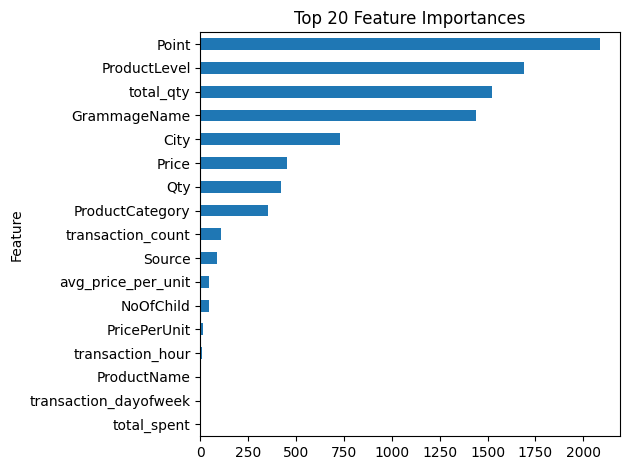

In [93]:
# Create DataFrame
fi_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
fi_df.head(20).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()

## 4. Predict

In [100]:
df_test = df_test.drop(columns=['DateOfBirth'])

In [101]:
# Step 1: Datetime parsing
datetime_cols = ['TransactionDatetime','JoinDate','EldestKidDOB','YoungestKidDOB']
for col in datetime_cols:
    df_test[col] = pd.to_datetime(df_test[col], errors='coerce')

if df_test['TransactionDatetime'].dt.tz is not None:
    df_test['TransactionDatetime'] = df_test['TransactionDatetime'].dt.tz_localize(None)

In [102]:
df_test['transaction_dayofweek'] = df_test['TransactionDatetime'].dt.dayofweek
df_test['transaction_hour'] = df_test['TransactionDatetime'].dt.hour

agg_cols = {
    'Price':'sum',
    'Qty':'sum',
    'PricePerUnit':'mean',
    'TransactionID':'count'
}
agg_df_test = df_test.groupby('MemberID').agg(agg_cols).rename(columns={
    'Price':'total_spent',
    'Qty':'total_qty',
    'PricePerUnit':'avg_price_per_unit',
    'TransactionID':'transaction_count'
}).reset_index()

# Merge aggregates back
df_test = df_test.merge(agg_df_test, on='MemberID', how='left')

In [107]:
df_test.columns

Index(['TransactionID', 'MemberID', 'Source', 'productID', 'prodgramID', 'Qty',
       'PricePerUnit', 'TransactionDatetime', 'ProductName', 'ProductCategory',
       'ProductLevel', 'GrammageName', 'Point', 'Price', 'JoinDate', 'City',
       'NoOfChild', 'EldestKidDOB', 'YoungestKidDOB', 'transaction_dayofweek',
       'transaction_hour', 'total_spent', 'total_qty', 'avg_price_per_unit',
       'transaction_count'],
      dtype='object')

In [105]:
X_test = df_clean.drop(columns=['next_buy','TransactionDatetime','JoinDate','EldestKidDOB','YoungestKidDOB', 'TransactionID', 'MemberID', 'productID', 'prodgramID'])
X_test = X_test.drop_duplicates(subset='MemberID')  # one row per MemberID
member_ids = X_test['MemberID']

25

In [25]:
preds = clf.predict(X_test)

submission = pd.DataFrame({
    'MemberID': member_ids,
    'next_buy': preds
})
submission.to_csv('trial2.csv', index=False)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# Gabungin Tabelnya, Member-Level

In [7]:
member2 = dataframes['member_data']
program2 = dataframes['prodgram_data']
product2 = dataframes['product_data']
transaction_test2 = dataframes['test_transaction_data']
transaction_train2 = dataframes['train_transaction_data']
label2 = dataframes['train_label_data']

### 1. Merge: Transaction + Product + Program

In [8]:
# samain nama primary key nya
transaction_test2.rename(columns={'FK_PRODUCT_ID': 'productID', 'FK_PROD_GRAM_ID': 'prodgramID'}, inplace=True)
transaction_train2.rename(columns={'FK_PRODUCT_ID': 'productID', 'FK_PROD_GRAM_ID': 'prodgramID'}, inplace=True)

# left join 
transaction_train2 = transaction_train2.merge(product, on='productID', how='left')
transaction_train2 = transaction_train2.merge(program, on='prodgramID', how='left')

transaction_test2 = transaction_test2.merge(product, on='productID', how='left')
transaction_test2 = transaction_test2.merge(program, on='prodgramID', how='left')

### 2. Aggregate Transaction per MemberID (yg train aja dulu)

In [9]:
transaction_train2["TransactionDatetime"] = pd.to_datetime(transaction_train2["TransactionDatetime"]) # buat bikin fitur waktu
transaction_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130854 entries, 0 to 130853
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   TransactionID        130854 non-null  object             
 1   MemberID             130854 non-null  object             
 2   Source               130854 non-null  object             
 3   productID            130854 non-null  int64              
 4   prodgramID           130854 non-null  int64              
 5   Qty                  130854 non-null  int64              
 6   PricePerUnit         111681 non-null  float64            
 7   TransactionDatetime  130854 non-null  datetime64[ns, UTC]
 8   ProductName          130854 non-null  object             
 9   ProductCategory      130854 non-null  object             
 10  ProductLevel         130854 non-null  object             
 11  GrammageName         130854 non-null  object             
 12  Po

ohh aman, meskipun Price dan GrammageName ada null, setelah di-join gaada null, brti emang di transaction_train gaada prodgramID yg null Price sama GrammageName nya. <br>
tipe data juga udah sesuai

In [10]:
transaction_train2["total_spent"] = transaction_train2["Qty"] * transaction_train2["PricePerUnit"]

transaction_train_agg2 = transaction_train2.groupby("MemberID").agg(
    num_transactions = ("TransactionID", "count"), # jumlah transaksi
    total_qty = ("Qty", "sum"), # total quantity
    avg_qty = ("Qty", "mean"), # rata-rata quantity
    total_spent = ("total_spent", "sum"), # total pengeluaran
    avg_spent = ("total_spent", "mean"), # rata-rata pengeluaran
    unique_products = ("productID", pd.Series.nunique), # jumlah produk unik
    unique_categories = ("ProductCategory", pd.Series.nunique), # jumlah kategori unik
    most_common_category = ("ProductCategory", lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), # kategori paling umum
    first_purchase = ("TransactionDatetime", "min"), # tanggal pembelian pertama
    last_purchase = ("TransactionDatetime", "max"), # tanggal pembelian terakhir
    unique_sources = ("Source", pd.Series.nunique), # jumlah sumber unik
    most_common_source = ("Source", lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan) # sumber paling umum
).reset_index()

### 3. Merge: Member + Transaction yg udah di-aggregate + Label

In [11]:
df_train2 = transaction_train_agg2.merge(member2, on="MemberID", how="left")
df_train2 = df_train2.merge(label2, on="MemberID", how="left")

In [12]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40020 entries, 0 to 40019
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   MemberID              40020 non-null  object             
 1   num_transactions      40020 non-null  int64              
 2   total_qty             40020 non-null  int64              
 3   avg_qty               40020 non-null  float64            
 4   total_spent           40020 non-null  float64            
 5   avg_spent             36284 non-null  float64            
 6   unique_products       40020 non-null  int64              
 7   unique_categories     40020 non-null  int64              
 8   most_common_category  40020 non-null  object             
 9   first_purchase        40020 non-null  datetime64[ns, UTC]
 10  last_purchase         40020 non-null  datetime64[ns, UTC]
 11  unique_sources        40020 non-null  int64              
 12  most

In [13]:
df_train2['MemberID'].nunique()

40020

## Modeling

In [29]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import balanced_accuracy_score, make_scorer
from lightgbm import LGBMClassifier

### Datetime parsing

In [15]:
datetime_cols = ['first_purchase','last_purchase','JoinDate','DateOfBirth','EldestKidDOB','YoungestKidDOB']
for col in datetime_cols:
    df_train2[col] = pd.to_datetime(df_train2[col], errors='coerce').dt.tz_localize(None)

# Also make reference date tz-naive
reference_date2 = pd.to_datetime(df_train2['last_purchase'].max()).tz_localize(None)

In [16]:
df_train2['days_since_last_purchase'] = (reference_date2 - df_train2['last_purchase']).dt.days
df_train2['days_since_first_purchase'] = (reference_date2 - df_train2['first_purchase']).dt.days
df_train2['purchase_duration'] = (df_train2['last_purchase'] - df_train2['first_purchase']).dt.days

df_train2['membership_duration'] = (reference_date2 - df_train2['JoinDate']).dt.days
df_train2['youngest_kid_age'] = (reference_date2 - df_train2['YoungestKidDOB']).dt.days
df_train2['eldest_kid_age'] = (reference_date2 - df_train2['EldestKidDOB']).dt.days

df_train2['join_month'] = df_train2['JoinDate'].dt.month
df_train2['join_year'] = df_train2['JoinDate'].dt.year

In [17]:
df_train2 = df_train2.drop(columns=datetime_cols)

In [18]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40020 entries, 0 to 40019
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MemberID                   40020 non-null  object 
 1   num_transactions           40020 non-null  int64  
 2   total_qty                  40020 non-null  int64  
 3   avg_qty                    40020 non-null  float64
 4   total_spent                40020 non-null  float64
 5   avg_spent                  36284 non-null  float64
 6   unique_products            40020 non-null  int64  
 7   unique_categories          40020 non-null  int64  
 8   most_common_category       40020 non-null  object 
 9   unique_sources             40020 non-null  int64  
 10  most_common_source         40020 non-null  object 
 11  City                       40020 non-null  object 
 12  NoOfChild                  40020 non-null  int64  
 13  next_buy                   40020 non-null  int

### Feature engineering

### Split

In [63]:
X2 = df_train2.drop(columns=['next_buy','MemberID', 'purchase_duration'])
y2 = df_train2['next_buy']

In [64]:
# Identify column types
numeric_cols = X2.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = [col for col in X2.columns if col not in numeric_cols]

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from lightgbm import LGBMClassifier

# 1. First split: train_val vs internal_test (e.g., 15% test)
X_temp, X_test2, y_temp, y_test2 = train_test_split(
    X2, y2, test_size=0.15, stratify=y2, random_state=42)

# 2. Second split: train vs validation (e.g., 20% of 85% = ~17% of total)
X_train2, X_val2, y_train2, y_val2 = train_test_split(
    X_temp, y_temp, test_size=0.2, stratify=y_temp, random_state=42)

# 3. Define preprocessing pipelines
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# 4. Define model pipeline
model2 = LGBMClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=300,
    learning_rate=0.05
)

clf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model2)
])

# 5. Fit model on train
clf.fit(X_train2, y_train2)

[LightGBM] [Info] Number of positive: 1658, number of negative: 25555
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2621
[LightGBM] [Info] Number of data points in the train set: 27213, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [66]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, make_scorer

# Validation performance
val_preds2 = clf.predict(X_val2)
val_bal_acc2 = balanced_accuracy_score(y_val2, val_preds2)
print('Validation Balanced Accuracy:', val_bal_acc2)

# Internal test performance (simulating Kaggle leaderboard)
test_preds2 = clf.predict(X_test2)
test_bal_acc2 = balanced_accuracy_score(y_test2, test_preds2)
print('Internal Test Balanced Accuracy:', test_bal_acc2)

# Cross-validation on training set only
cv2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores2 = cross_val_score(
    clf, X_train2, y_train2,
    cv=cv2,
    scoring=make_scorer(balanced_accuracy_score),
    n_jobs=-1
)
print('CV balanced accuracy mean (on training set):', cv_scores2.mean())
print('CV scores:', cv_scores2)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Validation Balanced Accuracy: 0.8616962645437845
Internal Test Balanced Accuracy: 0.8557278170867542


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


CV balanced accuracy mean (on training set): 0.8560888468194771
CV scores: [0.85697368 0.84746902 0.86657882 0.8632799  0.84614282]


<Figure size 800x600 with 0 Axes>

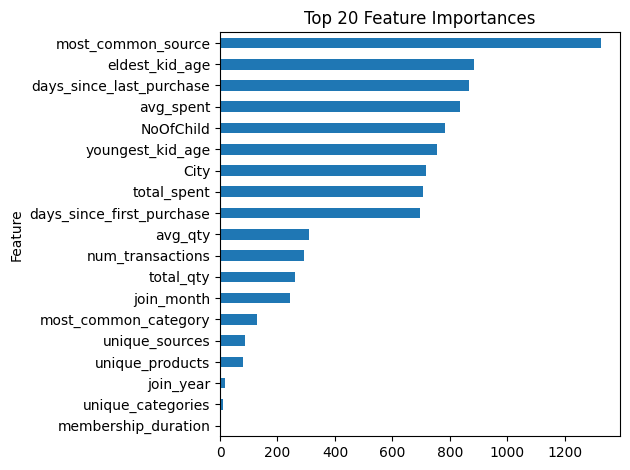

In [67]:
import matplotlib.pyplot as plt

model2 = clf.named_steps['model'] 
importances = model2.feature_importances_

# Create DataFrame
fi_df2 = pd.DataFrame({
    'Feature': X2.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
fi_df2.head(20).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()

## Predict (Member-Level)

### Preprocess Seperti Train

In [36]:
transaction_test2["TransactionDatetime"] = pd.to_datetime(transaction_test2["TransactionDatetime"]) # buat bikin fitur waktu
transaction_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21098 entries, 0 to 21097
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   TransactionID        21098 non-null  object             
 1   MemberID             21098 non-null  object             
 2   Source               21098 non-null  object             
 3   productID            21098 non-null  int64              
 4   prodgramID           21098 non-null  int64              
 5   Qty                  21098 non-null  int64              
 6   PricePerUnit         17917 non-null  float64            
 7   TransactionDatetime  21098 non-null  datetime64[ns, UTC]
 8   ProductName          21098 non-null  object             
 9   ProductCategory      21098 non-null  object             
 10  ProductLevel         21098 non-null  object             
 11  GrammageName         21098 non-null  object             
 12  Point             

In [37]:
transaction_test2["total_spent"] = transaction_test2["Qty"] * transaction_test2["PricePerUnit"]

transaction_test_agg2 = transaction_test2.groupby("MemberID").agg(
    num_transactions = ("TransactionID", "count"), # jumlah transaksi
    total_qty = ("Qty", "sum"), # total quantity
    avg_qty = ("Qty", "mean"), # rata-rata quantity
    total_spent = ("total_spent", "sum"), # total pengeluaran
    avg_spent = ("total_spent", "mean"), # rata-rata pengeluaran
    unique_products = ("productID", pd.Series.nunique), # jumlah produk unik
    unique_categories = ("ProductCategory", pd.Series.nunique), # jumlah kategori unik
    most_common_category = ("ProductCategory", lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan), # kategori paling umum
    first_purchase = ("TransactionDatetime", "min"), # tanggal pembelian pertama
    last_purchase = ("TransactionDatetime", "max"), # tanggal pembelian terakhir
    unique_sources = ("Source", pd.Series.nunique), # jumlah sumber unik
    most_common_source = ("Source", lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan) # sumber paling umum
).reset_index()

In [38]:
df_test2 = transaction_test_agg2.merge(member, on="MemberID", how="left")

In [39]:
for col in datetime_cols:
    df_test2[col] = pd.to_datetime(df_test2[col], errors='coerce').dt.tz_localize(None)

In [40]:
df_test2['days_since_last_purchase'] = (reference_date2 - df_test2['last_purchase']).dt.days
df_test2['days_since_first_purchase'] = (reference_date2 - df_test2['first_purchase']).dt.days
df_test2['purchase_duration'] = (df_test2['last_purchase'] - df_test2['first_purchase']).dt.days

df_test2['membership_duration'] = (reference_date2 - df_test2['JoinDate']).dt.days
df_test2['youngest_kid_age'] = (reference_date2 - df_test2['YoungestKidDOB']).dt.days
df_test2['eldest_kid_age'] = (reference_date2 - df_test2['EldestKidDOB']).dt.days

df_test2['join_month'] = df_test2['JoinDate'].dt.month
df_test2['join_year'] = df_test2['JoinDate'].dt.year

df_test2 = df_test2.drop(columns=datetime_cols)

In [68]:
prediction2 = clf.predict(df_test2.drop(columns=['MemberID', 'purchase_duration']))

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [69]:
submission2 = pd.DataFrame({
    'MemberID': df_test2['MemberID'],
    'next_buy': prediction2
})

In [70]:
submission2.to_csv('trial5.csv', index=False)

## Kenapa Kaggle bisa cuma 0.5?

### Jangan-jangan dataset kaggle beda banget distribusinya dgn training 

In [44]:
X_kaggle = df_test2.drop(columns=['MemberID'])

In [45]:
X_kaggle

,num_transactions,total_qty,avg_qty,total_spent,avg_spent,unique_products,unique_categories,most_common_category,unique_sources,most_common_source,City,NoOfChild,days_since_last_purchase,days_since_first_purchase,purchase_duration,membership_duration,youngest_kid_age,eldest_kid_age,join_month,join_year
0,1,1,1.0,288500.0,288500.000000,1,1,A,1,INDOMARET,JAKARTA PUSAT,2,47,47,0,638,1008,1008,10,2019
1,1,1,1.0,78150.0,78150.000000,1,1,B,1,REMAJA,SURABAYA,1,88,88,0,86,1111,1111,4,2021
2,1,2,2.0,545600.0,545600.000000,1,1,A,1,MAMAMIA SWALAYAN,PEKANBARU,1,80,80,0,79,622,622,4,2021
3,1,1,1.0,269000.0,269000.000000,1,1,A,1,SUSU OKE,BEKASI,1,5,5,0,5,375,375,6,2021
4,1,2,2.0,320000.0,320000.000000,1,1,A,1,SEKIP,PALEMBANG,1,165,165,0,162,933,933,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6376,2,2,1.0,148700.0,148700.000000,1,1,A,2,GALAXY STAR,BATAM,1,340,343,3,643,1276,1276,9,2019
6377,1,1,1.0,165900.0,165900.000000,1,1,A,1,INDOMARET,JAKARTA TIMUR,1,68,68,0,86,852,852,4,2021
6378,8,12,1.5,1522400.0,217485.714286,1,1,A,1,LESTARI,SIDOARJO,1,180,339,158,554,1034,1034,12,2019
6379,1,1,1.0,282700.0,282700.000000,1,1,A,1,DIAMOND,PALEMBANG,1,290,290,0,288,683,683,9,2020


In [46]:
from scipy.stats import ks_2samp

# Compare distributions between sets (X_train2 vs X_test2)
ks_results = []
for col in numeric_cols:
    stat, p_value = ks_2samp(X_train2[col].dropna(), X_kaggle[col].dropna())
    ks_results.append({'feature': col, 'ks_stat': stat, 'p_value': p_value})

ks_df = pd.DataFrame(ks_results).sort_values(by='ks_stat', ascending=False)

# Print top shifted features
print(ks_df.head(10))

                      feature   ks_stat   p_value
14             eldest_kid_age  0.014923  0.197896
3                 total_spent  0.014922  0.197981
4                   avg_spent  0.014859  0.250558
13           youngest_kid_age  0.013028  0.341174
9    days_since_last_purchase  0.011898  0.453651
12        membership_duration  0.009911  0.686343
0            num_transactions  0.009055  0.786909
10  days_since_first_purchase  0.008741  0.821178
1                   total_qty  0.007788  0.910048
11          purchase_duration  0.006174  0.988569


gaada beda sih

### Range waktunya beda antara train sama kaggle?

In [50]:
print("Train range:", transaction_train2['TransactionDatetime'].min(), "→", transaction_train2['TransactionDatetime'].max())
print("Kaggle test range:", transaction_test2['TransactionDatetime'].min(), "→", transaction_test2['TransactionDatetime'].max())

Train range: 2020-07-01 00:00:00+00:00 → 2021-06-30 16:02:00+00:00
Kaggle test range: 2020-07-01 00:00:00+00:00 → 2021-06-30 12:37:00+00:00


gaada beda juga

### Bandingin range-nya

In [51]:
for col in X_kaggle.columns:
    if col in X_train2.columns:
        print(f"\n{col}:")
        print(f"Train2 range: {X_train2[col].min()} – {X_train2[col].max()}")
        print(f"Kaggle  range: {X_kaggle[col].min()} – {X_kaggle[col].max()}")


num_transactions:
Train2 range: 1 – 77
Kaggle  range: 1 – 103

total_qty:
Train2 range: 1 – 194
Kaggle  range: 1 – 155

avg_qty:
Train2 range: 1.0 – 15.0
Kaggle  range: 1.0 – 12.5

total_spent:
Train2 range: 0.0 – 32475000.0
Kaggle  range: 0.0 – 42735000.0

avg_spent:
Train2 range: 42600.0 – 3510000.0
Kaggle  range: 73450.0 – 3561250.0

unique_products:
Train2 range: 1 – 4
Kaggle  range: 1 – 3

unique_categories:
Train2 range: 1 – 2
Kaggle  range: 1 – 2

most_common_category:
Train2 range: A – B
Kaggle  range: A – B

unique_sources:
Train2 range: 1 – 9
Kaggle  range: 1 – 8

most_common_source:
Train2 range: 10S SWALAYAN – ZYAN KIDS
Kaggle  range: 88 SWALAYAN – ZYAN KIDS

City:
Train2 range: ACEH BARAT – YOGYAKARTA
Kaggle  range: ACEH BARAT – YOGYAKARTA

NoOfChild:
Train2 range: 1 – 8
Kaggle  range: 1 – 8

days_since_last_purchase:
Train2 range: 0 – 364
Kaggle  range: 0 – 364

days_since_first_purchase:
Train2 range: 0 – 364
Kaggle  range: 0 – 364

purchase_duration:
Train2 range: 0 – 

### Time-aware validation split

In [58]:
df_train2_timeaware = df_train2.sort_values(by='days_since_last_purchase', ascending=False)

In [59]:
cutoff_1 = int(len(df_train2) * 0.7)
cutoff_2 = int(len(df_train2) * 0.85)

train_df = df_train2.iloc[:cutoff_1]
val_df   = df_train2.iloc[cutoff_1:cutoff_2]
test_df  = df_train2.iloc[cutoff_2:]


drop_cols = ['MemberID', 'next_buy']

X_train2 = train_df.drop(columns=drop_cols)
y_train2 = train_df['next_buy']

X_val2 = val_df.drop(columns=drop_cols)
y_val2 = val_df['next_buy']

X_test2 = test_df.drop(columns=drop_cols)
y_test2 = test_df['next_buy']


In [60]:
clf.fit(X_train2, y_train2)

val_preds2 = clf.predict(X_val2)
test_preds2 = clf.predict(X_test2)

from sklearn.metrics import balanced_accuracy_score

print('Validation Balanced Accuracy:', balanced_accuracy_score(y_val2, val_preds2))
print('Internal Test Balanced Accuracy:', balanced_accuracy_score(y_test2, test_preds2))

[LightGBM] [Info] Number of positive: 1700, number of negative: 26314
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2880
[LightGBM] [Info] Number of data points in the train set: 28014, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Validation Balanced Accuracy: 0.8647656940760389
Internal Test Balanced Accuracy: 0.858454275103126


cukup general over-time, gak masalah di sini

### Cek Feature Importance dan Leakage

<Figure size 800x600 with 0 Axes>

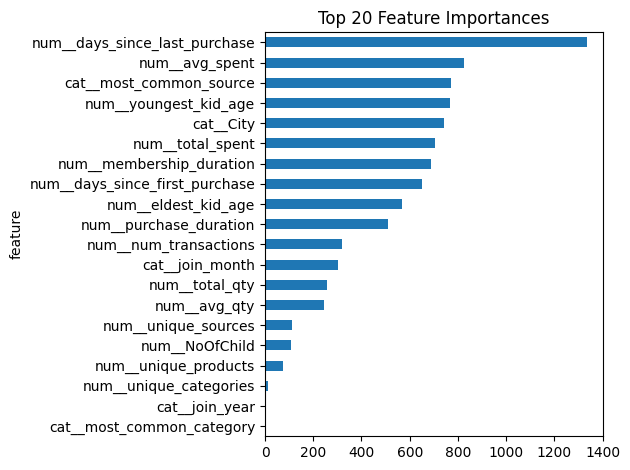

In [ ]:
# Extract feature importances from the fitted LGBM model
model = clf.named_steps['model']
feature_names = clf.named_steps['preprocessor'].get_feature_names_out()

importances = model.feature_importances_
feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(8, 6))
feat_imp_df.head(20).plot(kind='barh', x='feature', y='importance', legend=False)
plt.title("Top 20 Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Gaada ide lagi, yaudah coba hyperparameter tuning, kalau disini naik, semoga Kaggle jg naik

In [71]:
import optuna

In [72]:
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [76]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 15, 63),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'random_state': 42,
        'class_weight': 'balanced',
        'n_jobs': -1
    }
    
    model2 = LGBMClassifier(**params, verbose=-1)
    clf = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X_train2, y_train2, cv=cv, scoring=make_scorer(balanced_accuracy_score))
    return scores.mean()

# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)  # Adjust number of trials as needed

study.best_params

[I 2025-07-01 13:12:26,633] A new study created in memory with name: no-name-096495be-58fb-4cef-b271-92b9470342b9


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:12:41,531] Trial 0 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 203, 'max_depth': 4, 'num_leaves': 33, 'min_child_samples': 30, 'subsample': 0.6465174468787295, 'colsample_bytree': 0.8498586744494688, 'reg_alpha': 0.004879452515074267, 'reg_lambda': 0.31828392076969647, 'learning_rate': 0.011115090598723055}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:12:48,199] Trial 1 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 167, 'max_depth': 3, 'num_leaves': 49, 'min_child_samples': 67, 'subsample': 0.9744847612489536, 'colsample_bytree': 0.9863894544538033, 'reg_alpha': 0.48066449970557656, 'reg_lambda': 0.4349256198145549, 'learning_rate': 0.01580519255582068}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:12:54,066] Trial 2 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 318, 'max_depth': 8, 'num_leaves': 39, 'min_child_samples': 67, 'subsample': 0.7436318862294171, 'colsample_bytree': 0.908173403043101, 'reg_alpha': 0.7894074604542455, 'reg_lambda': 0.9285655932374652, 'learning_rate': 0.09155382617521009}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006786 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:13:01,754] Trial 3 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 148, 'max_depth': 7, 'num_leaves': 44, 'min_child_samples': 42, 'subsample': 0.6986381404820063, 'colsample_bytree': 0.7354311431605323, 'reg_alpha': 0.37131789590447617, 'reg_lambda': 0.20271363274776377, 'learning_rate': 0.015254609895170535}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:13:08,659] Trial 4 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 409, 'max_depth': 4, 'num_leaves': 22, 'min_child_samples': 53, 'subsample': 0.8156659368267434, 'colsample_bytree': 0.7131150035623138, 'reg_alpha': 0.534643381340869, 'reg_lambda': 0.5031388195179564, 'learning_rate': 0.09076827147973908}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:13:15,145] Trial 5 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 434, 'max_depth': 6, 'num_leaves': 50, 'min_child_samples': 55, 'subsample': 0.9684502099886811, 'colsample_bytree': 0.833691428006016, 'reg_alpha': 0.18452029307745577, 'reg_lambda': 0.47707019373388304, 'learning_rate': 0.017534457649028442}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:13:21,477] Trial 6 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 472, 'max_depth': 10, 'num_leaves': 16, 'min_child_samples': 97, 'subsample': 0.852242971263433, 'colsample_bytree': 0.9031266634519662, 'reg_alpha': 0.9732753444557235, 'reg_lambda': 0.9867883866197501, 'learning_rate': 0.041212413255320456}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:13:28,938] Trial 7 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 421, 'max_depth': 5, 'num_leaves': 54, 'min_child_samples': 68, 'subsample': 0.962920708323554, 'colsample_bytree': 0.9313050998952281, 'reg_alpha': 0.9443683005581399, 'reg_lambda': 0.9599551774310634, 'learning_rate': 0.09587664721114705}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:13:35,156] Trial 8 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 313, 'max_depth': 10, 'num_leaves': 44, 'min_child_samples': 67, 'subsample': 0.65125058148903, 'colsample_bytree': 0.9285975204922949, 'reg_alpha': 0.22484846235984857, 'reg_lambda': 0.611563593890724, 'learning_rate': 0.02602973341923126}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005889 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:13:42,362] Trial 9 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 378, 'max_depth': 9, 'num_leaves': 62, 'min_child_samples': 16, 'subsample': 0.6873074219115314, 'colsample_bytree': 0.9321717534219374, 'reg_alpha': 0.6334605246626505, 'reg_lambda': 0.2061132264013119, 'learning_rate': 0.05479121862841471}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006568 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:13:48,838] Trial 10 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 224, 'max_depth': 3, 'num_leaves': 30, 'min_child_samples': 10, 'subsample': 0.6140050636836969, 'colsample_bytree': 0.6115291708112148, 'reg_alpha': 0.1001109509936069, 'reg_lambda': 0.008853060050391603, 'learning_rate': 0.06980398610840412}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:13:57,004] Trial 11 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 184, 'max_depth': 3, 'num_leaves': 32, 'min_child_samples': 37, 'subsample': 0.8872040115879722, 'colsample_bytree': 0.9831158154402639, 'reg_alpha': 0.03234283916454728, 'reg_lambda': 0.33170369650945236, 'learning_rate': 0.035745997379385434}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:14:03,204] Trial 12 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 108, 'max_depth': 5, 'num_leaves': 34, 'min_child_samples': 88, 'subsample': 0.7682465744165969, 'colsample_bytree': 0.8145541425053852, 'reg_alpha': 0.33837153182032864, 'reg_lambda': 0.687380809107837, 'learning_rate': 0.010264076097971125}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:14:11,287] Trial 13 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 241, 'max_depth': 4, 'num_leaves': 55, 'min_child_samples': 31, 'subsample': 0.9069212393652887, 'colsample_bytree': 0.9999373611792679, 'reg_alpha': 0.7338792157807799, 'reg_lambda': 0.341715716024313, 'learning_rate': 0.03360103892862307}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:14:18,970] Trial 14 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 233, 'max_depth': 3, 'num_leaves': 25, 'min_child_samples': 25, 'subsample': 0.99908144453778, 'colsample_bytree': 0.8486551327781491, 'reg_alpha': 0.4091877750767441, 'reg_lambda': 0.021940803069759207, 'learning_rate': 0.057715277780641214}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:14:25,120] Trial 15 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 106, 'max_depth': 5, 'num_leaves': 41, 'min_child_samples': 82, 'subsample': 0.6035649242581353, 'colsample_bytree': 0.7337672283288752, 'reg_alpha': 0.5644180291311899, 'reg_lambda': 0.7525314321595888, 'learning_rate': 0.025761806179516095}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:14:31,552] Trial 16 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 163, 'max_depth': 4, 'num_leaves': 49, 'min_child_samples': 49, 'subsample': 0.8077233003820276, 'colsample_bytree': 0.7733840988333618, 'reg_alpha': 0.0029213882023779725, 'reg_lambda': 0.3769561522656803, 'learning_rate': 0.04908421668163378}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:14:37,904] Trial 17 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 287, 'max_depth': 6, 'num_leaves': 63, 'min_child_samples': 78, 'subsample': 0.726773527197403, 'colsample_bytree': 0.8681860171509156, 'reg_alpha': 0.23142650993165403, 'reg_lambda': 0.2185067726162544, 'learning_rate': 0.02025645765425989}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:14:43,785] Trial 18 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 196, 'max_depth': 4, 'num_leaves': 35, 'min_child_samples': 60, 'subsample': 0.9078403122972457, 'colsample_bytree': 0.6135497208296803, 'reg_alpha': 0.8111653264948433, 'reg_lambda': 0.4748454801200016, 'learning_rate': 0.07026911558169288}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:14:49,819] Trial 19 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 140, 'max_depth': 3, 'num_leaves': 26, 'min_child_samples': 22, 'subsample': 0.8612377604779203, 'colsample_bytree': 0.6829707080827921, 'reg_alpha': 0.4421214215497188, 'reg_lambda': 0.11934100928409891, 'learning_rate': 0.02875983005428656}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:14:56,221] Trial 20 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 272, 'max_depth': 7, 'num_leaves': 38, 'min_child_samples': 44, 'subsample': 0.6645683604993255, 'colsample_bytree': 0.7797890943355037, 'reg_alpha': 0.29623602806332733, 'reg_lambda': 0.601907661950964, 'learning_rate': 0.0104287594867529}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:15:02,600] Trial 21 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 356, 'max_depth': 8, 'num_leaves': 40, 'min_child_samples': 71, 'subsample': 0.7493957454818935, 'colsample_bytree': 0.8874357854952908, 'reg_alpha': 0.8155593896765526, 'reg_lambda': 0.845603968823003, 'learning_rate': 0.08092972687576089}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:15:08,933] Trial 22 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 329, 'max_depth': 8, 'num_leaves': 48, 'min_child_samples': 63, 'subsample': 0.7721724869793992, 'colsample_bytree': 0.9576657935374474, 'reg_alpha': 0.663534371607511, 'reg_lambda': 0.4253980608051711, 'learning_rate': 0.08221924844644839}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:15:17,233] Trial 23 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 245, 'max_depth': 8, 'num_leaves': 44, 'min_child_samples': 76, 'subsample': 0.7237882573361187, 'colsample_bytree': 0.9669329607509428, 'reg_alpha': 0.7924262068512563, 'reg_lambda': 0.5769607385327475, 'learning_rate': 0.04429447347740696}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:15:28,098] Trial 24 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 198, 'max_depth': 9, 'num_leaves': 57, 'min_child_samples': 88, 'subsample': 0.6355593313190533, 'colsample_bytree': 0.8830064463835402, 'reg_alpha': 0.877206660132749, 'reg_lambda': 0.28440606165404986, 'learning_rate': 0.06333117422640012}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:15:34,906] Trial 25 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 276, 'max_depth': 6, 'num_leaves': 36, 'min_child_samples': 33, 'subsample': 0.685505489793672, 'colsample_bytree': 0.9138411138004512, 'reg_alpha': 0.4716039861568392, 'reg_lambda': 0.8376752675689888, 'learning_rate': 0.02017652218201683}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006913 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:15:40,828] Trial 26 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 334, 'max_depth': 7, 'num_leaves': 30, 'min_child_samples': 63, 'subsample': 0.7839362278145863, 'colsample_bytree': 0.9529625538003436, 'reg_alpha': 0.1498146465377745, 'reg_lambda': 0.7112731917158754, 'learning_rate': 0.08099840107430117}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:15:46,608] Trial 27 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 213, 'max_depth': 9, 'num_leaves': 46, 'min_child_samples': 53, 'subsample': 0.8336800879780524, 'colsample_bytree': 0.8562061680068752, 'reg_alpha': 0.6974130735773305, 'reg_lambda': 0.5392073859925387, 'learning_rate': 0.09816763326294072}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:15:52,763] Trial 28 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 259, 'max_depth': 5, 'num_leaves': 52, 'min_child_samples': 46, 'subsample': 0.7276586186396204, 'colsample_bytree': 0.8195958391595898, 'reg_alpha': 0.5752638900812823, 'reg_lambda': 0.39642155557378184, 'learning_rate': 0.033260055768900426}. Best is trial 0 with value: 0.8560888468194771.


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2614
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1326, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 21770, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1327, number of negative: 20444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 21771, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-07-01 13:15:59,984] Trial 29 finished with value: 0.8560888468194771 and parameters: {'n_estimators': 146, 'max_depth': 4, 'num_leaves': 41, 'min_child_samples': 41, 'subsample': 0.941361462863102, 'colsample_bytree': 0.7932726207506939, 'reg_alpha': 0.33818669632264303, 'reg_lambda': 0.24773438990819163, 'learning_rate': 0.01525091212244338}. Best is trial 0 with value: 0.8560888468194771.


{'n_estimators': 203,
 'max_depth': 4,
 'num_leaves': 33,
 'min_child_samples': 30,
 'subsample': 0.6465174468787295,
 'colsample_bytree': 0.8498586744494688,
 'reg_alpha': 0.004879452515074267,
 'reg_lambda': 0.31828392076969647,
 'learning_rate': 0.011115090598723055}

In [78]:
best_params = study.best_params

In [79]:
best_params.update({
    'random_state': 42,
    'class_weight': 'balanced',
    'n_jobs': -1,
    'verbose': -1  # to silence training logs
})

In [80]:
model2_tuned = LGBMClassifier(**best_params)

clf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model2_tuned)
])
clf.fit(X_train2, y_train2)

# Validation performance
val_preds2 = clf.predict(X_val2)
val_bal_acc2 = balanced_accuracy_score(y_val2, val_preds2)
print('Validation Balanced Accuracy:', val_bal_acc2)

# Internal test performance (simulating Kaggle leaderboard)
test_preds2 = clf.predict(X_test2)
test_bal_acc2 = balanced_accuracy_score(y_test2, test_preds2)
print('Internal Test Balanced Accuracy:', test_bal_acc2)

# Cross-validation on training set only
cv2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores2 = cross_val_score(
    clf, X_train2, y_train2,
    cv=cv2,
    scoring=make_scorer(balanced_accuracy_score),
    n_jobs=-1
)
print('CV balanced accuracy mean (on training set):', cv_scores2.mean())
print('CV scores:', cv_scores2)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Validation Balanced Accuracy: 0.8778628291488059
Internal Test Balanced Accuracy: 0.8724956886147439
CV balanced accuracy mean (on training set): 0.8804358275583543
CV scores: [0.8677834  0.87337758 0.89649569 0.8865973  0.87792517]


In [82]:
prediction2_tuned = clf.predict(df_test2.drop(columns=['MemberID', 'purchase_duration']))

submission2_tuned = pd.DataFrame({
    'MemberID': df_test2['MemberID'],
    'next_buy': prediction2_tuned
})

submission2_tuned.to_csv('trial7.csv', index=False)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
